#### Import libraries for this project

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import time
import plotly.express as px
import plotly.graph_objects as go
import folium as fl

## 1. Data Understanding

It's important to understand what the data represents, what the values mean, and what problems might occur during cleaning before start cleaning the data. This understanding can be an aid to the selection of the right cleaning techniques and the avoidance of errors.

In [2]:
# Create a DataFrame from CSV file
file_path = 'https://raw.githubusercontent.com/diogo-costa-silva/datasets/main/nyc_airbnb_open_data/AB_NYC_2019.csv'
df = pd.read_csv(file_path)

# First 5 rows of the DataFrame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# The summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

From this output, we can see that the DataFrame has 48,895 rows (entries) and 16 columns. The columns have different data types, including int64, float64, and object. We can also see that some columns have missing values (‘name’, ‘host_name’, ‘last_review’, and ‘reviews_per_month’), as indicated by the difference between the total number of entries (48,895) and the number of non-null values for those columns.

## 2. Data cleaning 

This stage is a crucial step in the process of data analysis. It involves identifying and correcting errors, inconsistencies, and missing values in a dataset. This process is essential as it ensures the accuracy and completeness of the data before conducting any analysis.

Let's explore the different techniques and tools used in data cleaning, covering topics such as handling missing data, dealing with outliers, and preparing the dataset for analysis.

### 2.1. Data Types

We can see that ‘last_review’ column contains dates, but it’s type is object. There is a need to change it to a datetime data type. It’ll allow to perform calculations on the dates.

In [5]:
df['last_review'] = pd.to_datetime(df['last_review'])

Columns ‘neighbourhood_group’, ‘neighbourhood’, and ‘room_type’ are categorical variables, so it’ll be more appropriate to convert them from an object to a category type.

In [6]:
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')
df['neighbourhood'] = df['neighbourhood'].astype('category')
df['room_type'] = df['room_type'].astype('category')

Now we can see unique categories in these columns:

In [24]:
df.value_counts('neighbourhood_group')

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
dtype: int64

In [8]:
# Check the data types
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                     category
neighbourhood                           category
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

### 2.2. Duplicates
Duplicate rows can cause problems in your analysis by inflating the weight of some observations, skewing the results of statistical analyses, or even giving an incorrect impression of the underlying data.

In [9]:
df.duplicated().sum()

0

There are no duplicate rows in the DataFrame.

### 2.3. Missing Data
Missing data can cause problems in your analysis, such as biased results, incorrect statistical inferences, and errors in machine learning models. By identifying missing data, you can decide how to handle it, whether it’s by imputing the missing values or dropping the rows with missing values.

In [10]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are missing values in four columns: ‘name’, ‘host_name’, ‘last_review’, and ‘reviews_per_month’.

#### Techniques to deal with missing data:

- Deletion: You can simply delete the missing values or the entire row or column where they occur. However, this should only be done if the amount of missing data is small and there is no important information in the missing values.
- Imputation: You can impute (fill in) the missing values with some other value or technique. This can be done by replacing missing values with a mean, median, or mode of the data, or by using more sophisticated techniques like regression or machine learning algorithms to predict the missing values.
- Interpolation: You can use interpolation techniques to estimate the missing values by using the values of neighboring data points. This is particularly useful for time series data.
- Data augmentation: You can use data augmentation techniques to create new data points based on existing data points. This can be done by using statistical techniques to generate new values or by using machine learning algorithms to generate new data points.

Considering the fact that ‘name’ column is insignificant for future data analysis, so we can simply replce null values with ‘N/A’.

In [11]:
df.fillna({'name': 'N/A'}, inplace=True)

The ‘host_name’ column is irrelevant and there is no need to store people names. This column can be dropped.

The ‘last_review’ column contains the date of the last review and missing values simply mean that there no reviews for this item. This column is also irrelevant for future data analysis and we can also drop it.

In [12]:
df.drop(['id', 'host_name', 'last_review'], axis=1, inplace=True)

NOTE: The ‘id’ column is often dropped from a dataset during the data cleaning process, because it doesn’t provide any meaningful insights for the analysis.

The ‘reviews_per_month’ column gives information about the number of reviews per month. Since a missing value means the item has no reviews for all time, it has 0 reviews per month.

In [13]:
df.fillna({'reviews_per_month': 0}, inplace=True)

In [14]:
df.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Now you can see that we solved the problem of missing values.

### 2.4. Outliers
Outliers are data points that are significantly different from other data points in a dataset. They can be much larger or much smaller than the other data points in the dataset and can distort the overall analysis of the data.

There are different techniques to identify outliers, such as using boxplots, scatterplots, or mathematical methods such as the z-score or the interquartile range (IQR). Once outliers are identified, they can be dealt with by either removing them from the dataset, adjusting them to more reasonable values, or treating them as a separate category in the analysis.

In [15]:
# Statistics of the numerical columns in the DataFrame
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Here are some observations from the output:

- ‘price’: The minimum price is 0, which seems strange, and the maximum price is 10,000, which is significantly higher than the 75th percentile. It also has high standard deviation.
- ‘minimum_nights’: The maximum value is 1,250, which is much higher than the 75th percentile.
- ‘number_of_reviews’: The maximum value is 629, which is much higher than the 75th percentile.
- ‘reviews_per_month’: The maximum value is 58.5, which is much higher than the 75th percentile.
- ‘calculated_host_listings_count’: The maximum value is 327, which is much higher than the 75th percentile.

All these factors indicate that there may be outliers in these columns.

It is important to investigate these columns further to determine if there are indeed outliers and how they should be handled in the data analysis process.



In [16]:
outlier_cols = [
    'price', 'minimum_nights', 'number_of_reviews', 
    'reviews_per_month', 'calculated_host_listings_count'
]

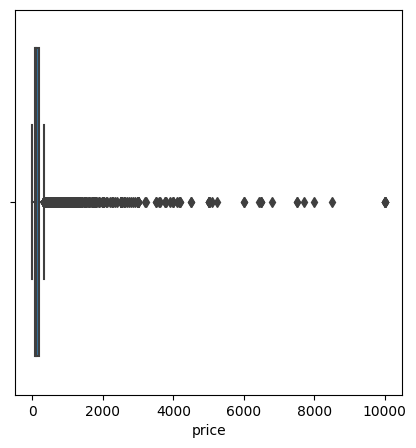

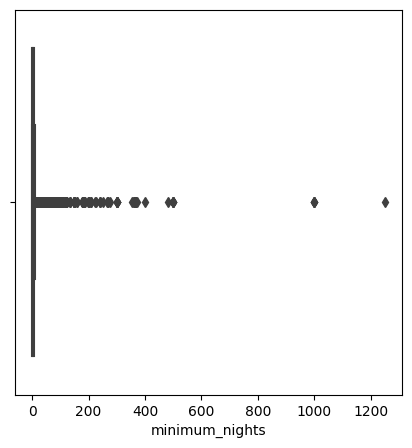

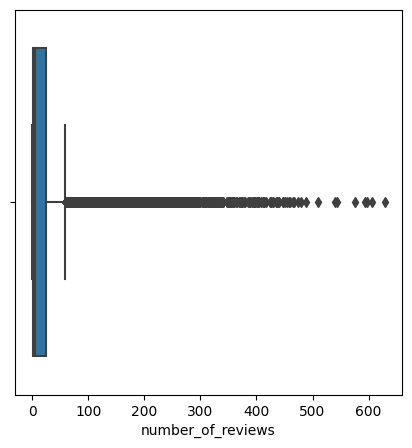

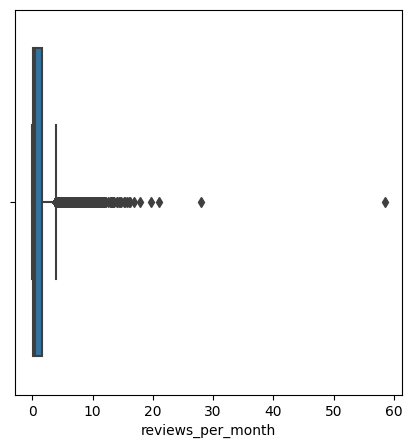

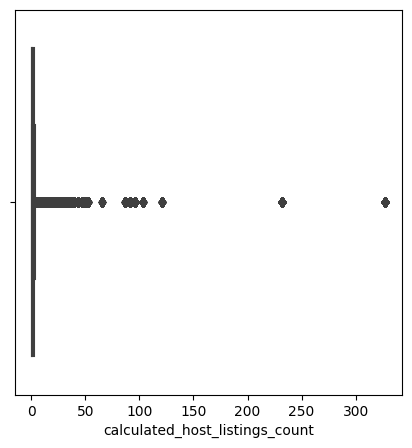

In [17]:
for col in outlier_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=df[col])
    plt.show()

Now we see that there are indeed outliers in all of these columns.

### 2.5. Z-score
We can also try a Z-score method to discover outliers. This method uses the standard deviation of the data to calculate the number of standard deviations a data point is away from the mean. A data point that falls outside a certain range (typically, outside 3 standard deviations from the mean) is considered an outlier.

Let’s find outliers in all numerical columns.

In [18]:
# Select numeric columns
df_numeric = df.select_dtypes(include=[np.number])

for col in df_numeric.columns:
    # Calculate z-score of the column
    z_score = np.abs(stats.zscore(df[col]))
    outliers_num = len(np.where(z_score > 3)[0])
    if outliers_num:
        print('{}: {}'.format(col, outliers_num))

latitude: 99
longitude: 1236
price: 388
minimum_nights: 327
number_of_reviews: 1221
reviews_per_month: 847
calculated_host_listings_count: 680


This method helped us to find outliers that we didn’t see when analyzing the describe table.

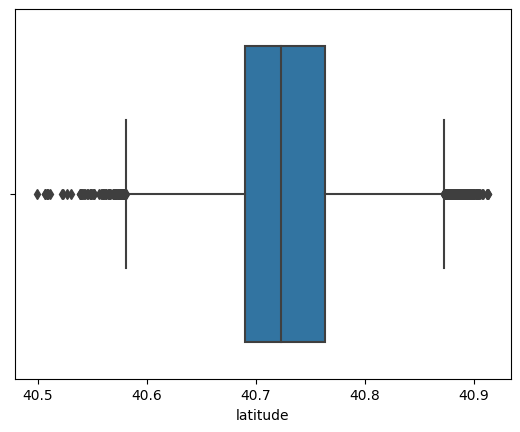

In [19]:
sns.boxplot(x=df['latitude']);

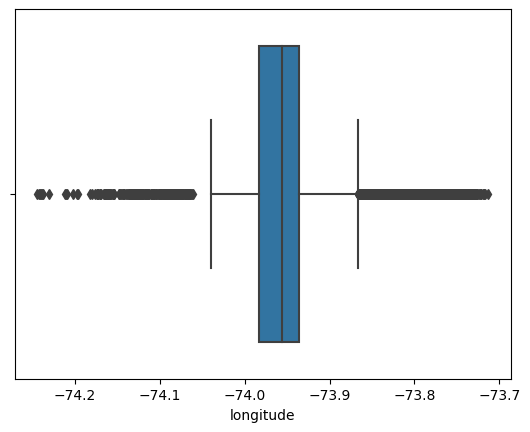

In [20]:
sns.boxplot(x=df['longitude']);

### 2.6. Dealing with Outliers
There are several ways to deal with outliers in a dataset:

- Remove the outliers: You can simply remove the rows containing outliers from your dataset. However, this can also lead to loss of information and affect the accuracy of your model. So, you should be careful while removing the outliers and make sure you have a valid reason for doing so.
- Replace the outliers: You can replace the outliers with a value that makes more sense, for example, the mean, median, or mode of the data. This method can help preserve the data and still reduce the effect of outliers.
- Transform the data: You can transform the data using techniques like log transformation, box-cox transformation, etc. This can help in reducing the effect of outliers and also improve the distribution of the data.

We can use Z-score method to remove outliers.

In [21]:
z_scores = np.abs(stats.zscore(df_numeric))

# DataFrame without outliers
df_wo_outliers = df[(z_scores < 3).all(axis=1)]
df_wo_outliers.shape

(44475, 13)

Done!
We have covered the basics of data cleaning, including how to check for and handle duplicates, how to deal with missing data, and how to identify and handle outliers.


## 3. Data Exploration

### 3.1. Calculating Rental Price Statistics

In this code, we are performing calculations on the rental price data. The variable rental_price is assigned the values of the 'price' column from the DataFrame.

In [26]:
# Assigning variable
rental_price = df_wo_outliers.loc[:, 'price']

#Calculate rental price statistics
mean_rent = np.mean(rental_price)
print('The average rental price is: $', round(mean_rent, 2))

max_rent = np.max(rental_price)
print('The maximum rental price is: $', round(max_rent, 2))

min_rent = np.min(rental_price)
print('The minimum rental price is: $', round(min_rent, 2))

rent_std = np.std(rental_price)
print('The standard deviation of rental prices is: $', round(rent_std, 2))

median_rent = np.median(rental_price)
print('The median rental price is: $', round(median_rent, 2))

The average rental price is: $ 138.6
The maximum rental price is: $ 860
The minimum rental price is: $ 0
The standard deviation of rental prices is: $ 107.74
The median rental price is: $ 105.0


- <b>Mean</b> ($138.6): This value indicates that, on average, the rental prices in New York City are around $152.72. However, this value can be influenced by very expensive or very cheap rentals, distorting the average.

- <b>Maximum Value</b> ($860): This is the highest rental price listed in New York City. The previous maximum (10000) was an extreme value and didn't represent the reality of the majority of rentals and therefore was removed because it was an outlier.

- <b>Minimum Value</B> ($0): This value indicates that there are listings for accommodations that are free. This could be a data entry error or a specific promotion.

- <b>Standard Deviation</b> ($107.74): This high value indicates that there is a large variation in rental prices. In other words, while some rentals are very cheap, others are very expensive.

- <b>Median</b> ($105): This value indicates that half of the rentals in New York City cost less than $106, and the other half cost more. The median is less sensitive to extreme values and can be a better representation of the “typical rent”.

In summary, rental prices in New York City vary greatly, with some extremely expensive rentals inflating the average. However, the majority of rentals appear to be more affordable, as indicated by the median of $106. The presence of free rentals is intriguing and may be worth further investigation.